# Importing Dependencies

In [ ]:
# For Data
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Training and Testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as ss

# For Support Vector Machine
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix





# 1. Data Preprocessing using pandas

In [ ]:
df = pd.read_csv('cleveland.csv')

type(df)

pandas.core.frame.DataFrame

In [ ]:
# labeling the data
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']


In [ ]:
# prints first 5 rows of the dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [ ]:
# prints entire dataframe
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     67    1   4       160   286    0        2      108      1      1.5   
1     67    1   4       120   229    0        2      129      1      2.6   
2     37    1   3       130   250    0        0      187      0      3.5   
3     41    0   2       130   204    0        2      172      0      1.4   
4     56    1   2       120   236    0        0      178      0      0.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
297   45    1   1       110   264    0        0      132      0      1.2   
298   68    1   4       144   193    1        0      141      0      3.4   
299   57    1   4       130   131    0        0      115      1      1.2   
300   57    0   2       130   236    0        2      174      0      0.0   
301   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  target  
0        2  3.0   3.0       2  
1        2  2.0   7.0  

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
# define rows and columns
df.shape

(302, 14)

In [ ]:
# statistical measures
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,298.000000,300.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.674497,4.730000,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,0.938202,1.941563,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
# No of missing values in each column
### 1 = male, 0 = female
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

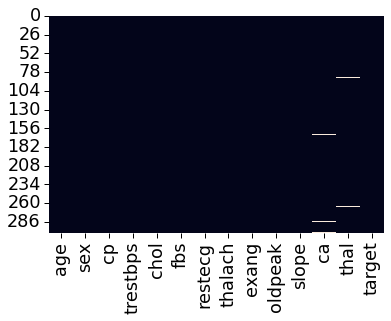

In [ ]:
#visualize the missing null values using heat map
sns.heatmap(df.isnull(),cbar=False)

In [ ]:
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['sex'] = df.sex.map({0: 'female', 1: 'male'})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())


# Data Visualization 


In [ ]:
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20,}) 


<Figure size 864x576 with 0 Axes>

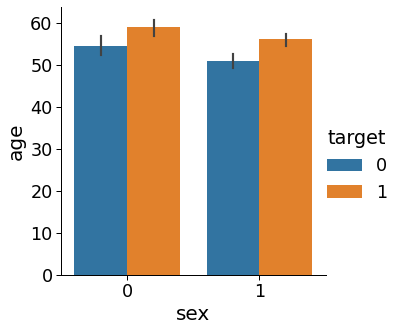

In [ ]:
# barplot of age vs sex with hue = target
plt.figure(figsize=(12,8))
sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'target')

Text(0, 0.5, 'Thalach Level')

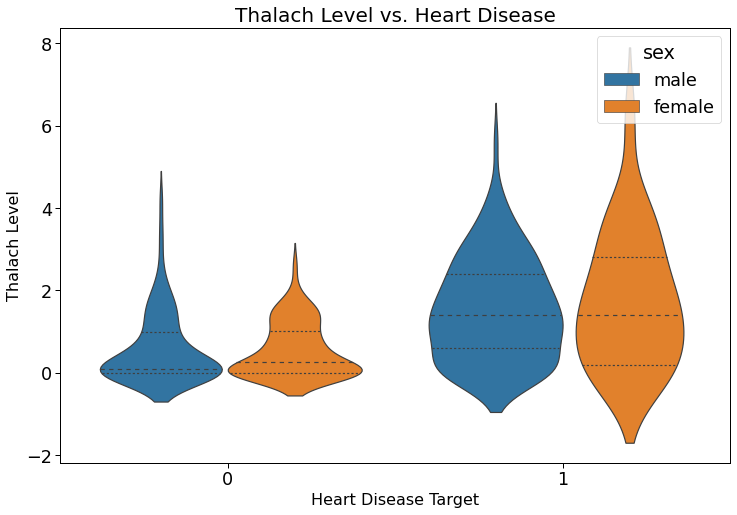

In [ ]:
plt.figure(figsize=(12,8))
sns.violinplot(x= 'target', y= 'oldpeak',hue="sex", inner='quartile',data= df )
plt.title("Thalach Level vs. Heart Disease",fontsize=20)
plt.xlabel("Heart Disease Target", fontsize=16)
plt.ylabel("Thalach Level", fontsize=16)

Text(0, 0.5, 'ST depression induced by exercise relative to rest')

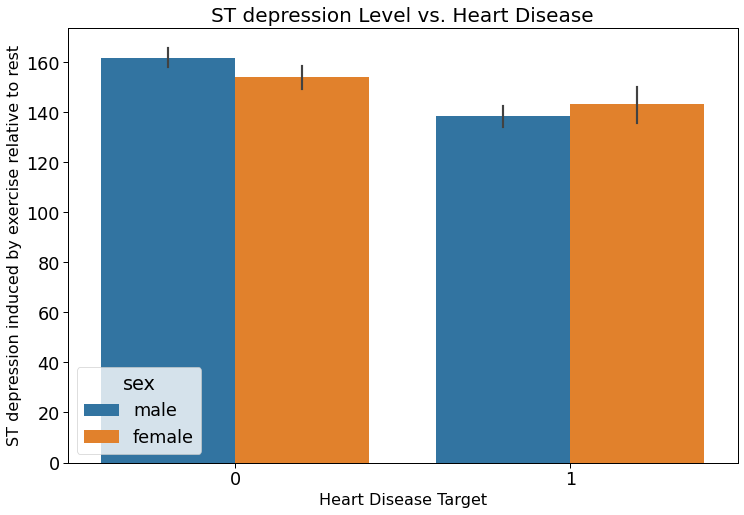

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x= 'target', y= 'thalach',hue="sex", data=df )
plt.title("ST depression Level vs. Heart Disease", fontsize=20)
plt.xlabel("Heart Disease Target",fontsize=16)
plt.ylabel("ST depression induced by exercise relative to rest", fontsize=16)

In [ ]:
df['sex'] = df.sex.map({'female': 0, 'male': 1})



# Training and Testing

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# SVM

In [ ]:
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)






In [ ]:
cm_test = confusion_matrix(y_pred, y_test)

In [ ]:
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)


In [ ]:
print(cm_test)

[[27  4]
 [ 6 24]]


In [ ]:
print(cm_train)

[[126  16]
 [  4  95]]


In [ ]:
print()
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))



Accuracy for training set for svm = 0.91701244813278
Accuracy for test set for svm = 0.8360655737704918


# Logistic Regression

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


classifier = LogisticRegression(solver='lbfgs', max_iter=1000)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)






In [ ]:

cm_test = confusion_matrix(y_pred, y_test)


In [ ]:
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

In [ ]:
print(cm_train)

[[118  23]
 [ 12  88]]


In [ ]:
print(cm_test)

[[29  3]
 [ 4 25]]


In [ ]:
print()
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Logistic Regression = 0.8547717842323651
Accuracy for test set for Logistic Regression = 0.8852459016393442
